In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt
import os.path

tr_genba= pd.read_csv("train_genba.tsv",sep='\t')
tr_goto= pd.read_csv("train_goto.tsv",sep='\t')
#tr_genba.head()
#tr_goto.head()

#tr_genba.info()
#tr_goto.info()
#len(tr_goto["kobetsu4"])#6461

#tr_genba.columns#カラム一覧
#tr_goto.columns#カラム一覧#keiyaku_prが目的変数

### 目的変数（販売価格）の統計量等

In [53]:
tr_goto["keiyaku_pr"].describe()#Rでいうsummary

count    6.461000e+03
mean     2.782169e+07
std      6.853475e+06
min      2.800000e+06
25%      2.330000e+07
50%      2.700000e+07
75%      3.180000e+07
max      6.280000e+07
Name: keiyaku_pr, dtype: float64

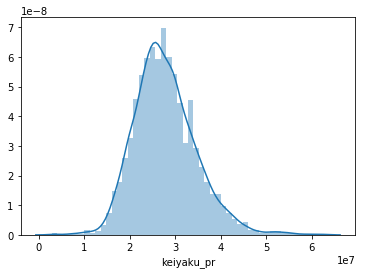

In [54]:
#販売価格のヒストグラム 
sns.distplot(tr_goto["keiyaku_pr"])

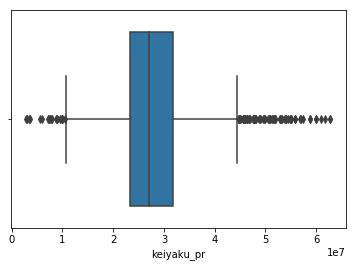

In [73]:
#販売価格の箱ひげ
sns.boxplot(tr_goto["keiyaku_pr"])

In [55]:
#尖度と歪度
print("Skewness: %f" % np.log(tr_goto["keiyaku_pr"]).skew())#正規分布に比べて結構広がってて山浅めってこと？
print("Kurtosis: %f" % np.log(tr_goto["keiyaku_pr"]).kurt())#正規分布に比べて中心が若干偏ってるってこと

Skewness: -0.675952
Kurtosis: 4.198325


In [77]:
#tr_gotoのスキャタープロット　
from pandas.plotting import scatter_matrix
#x = scatter_matrix(tr_goto,diagonal='hist')#19でてない
#sns.pairplot(tr_goto) #単位の違いがとれてない

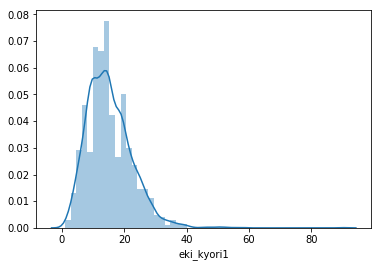

In [59]:
#駅距離のヒストグラム 
sns.distplot(tr_genba["eki_kyori1"])

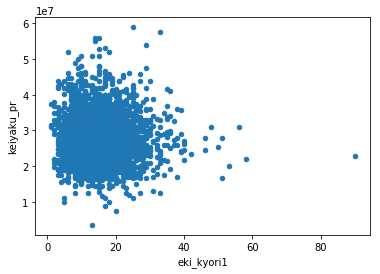

In [72]:
#駅の距離と販売価格
var="eki_kyori1"

a=pd.concat([tr_goto["keiyaku_pr"],tr_genba[var]], axis=1)
a.plot.scatter(x=var,y="keiyaku_pr")

### 決定木

In [78]:
from sklearn.tree import DecisionTreeClassifier
